In [164]:
#IMPORTS INICIALES
import pandas as pd
import numpy as np
import seaborn as sns
import random
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from kohonen import Kohonen

In [174]:
#PROPIEDADES DE CONFIGURACION
kohonenProperties = {
    'seed': 10,
    'maxEpochs':350,
    'k':5,
    'r0':4,
    'initialLearningRate':0.25
}

In [175]:
#SETEO DEL RANDOM SEED
np.random.seed(kohonenProperties.get('seed'))
random.seed(kohonenProperties.get('seed'))

In [176]:
#PROCESO DE DATOS DEL CSV
df=pd.read_csv('europe.csv')
dfWNames=df.copy()
df = df[df.columns[1:8]]
df.head()
trainingSet=StandardScaler().fit_transform(df)
countries=dfWNames.iloc[:,0]

In [177]:
#INICIALIZAR LA RED DE KOHONEN
countriesCharacteristicsCount = trainingSet.shape[1]
kohonen = Kohonen(countriesCharacteristicsCount,kohonenProperties['k'],kohonenProperties['r0'],kohonenProperties['maxEpochs'],kohonenProperties['initialLearningRate'],trainingSet,countries)

In [178]:
#ENTRENAR LA RED
#Creamos una lista para acumular las matrices de paises retornadas por la red en cada epoca
countriesMatrixList = []
for i in range(0,kohonenProperties['maxEpochs']):
    countriesMatrixList.append(kohonen.train(i+1))

Text(0.5, 1.0, 'Mapa de calor de los paises')

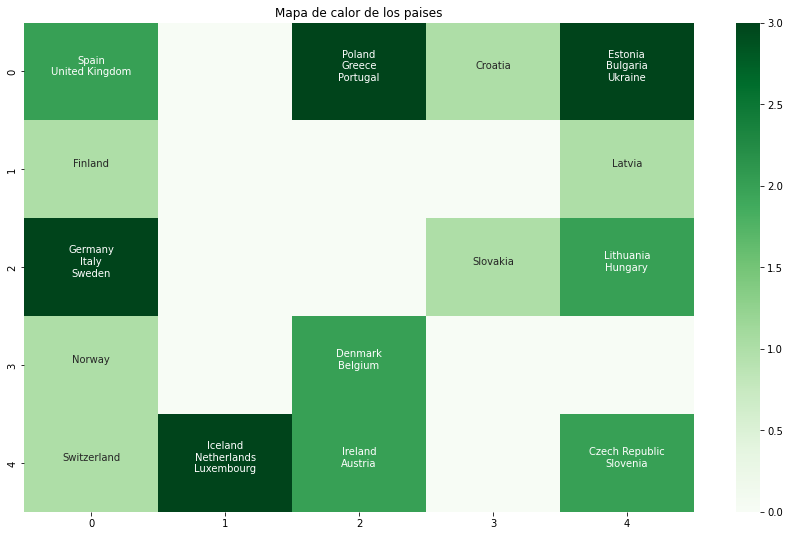

In [179]:
#CREAR MAPA DE CALOR DE PAISES
#Agarramos la matriz de paises correspondiente a la ultima epoca
lastCountriesMatrix = countriesMatrixList[-1]
#Creamos matrices para almacenar la cantidad de paises por grupo, y los paises de los mismos
lastCountriesMatrixAmounts = np.zeros((kohonen.k,kohonen.k))
countriesGroups = np.empty((kohonen.k,kohonen.k),object)
for i in range(0,kohonen.k):
    for j in range(0,kohonen.k):
        countryGroup = ''
        if(lastCountriesMatrix[i][j] is not None):
            lastCountriesMatrixAmounts[i][j] = len(lastCountriesMatrix[i][j])
            countryGroup = ''.join([f"{country}\n" for country in lastCountriesMatrix[i][j]])
        countriesGroups[i][j] = countryGroup
lastCountriesMatrixAmountsDF = pd.DataFrame(lastCountriesMatrixAmounts)
#Finalmente, creamos el mapa de calor correspondiente
plt.figure(figsize = (15,9))
sns.heatmap(data=lastCountriesMatrixAmountsDF,cmap=sns.color_palette("Greens", as_cmap=True),annot=countriesGroups,fmt='')
plt.title("Mapa de calor de los paises")

Text(0.5, 1.0, 'Matriz U')

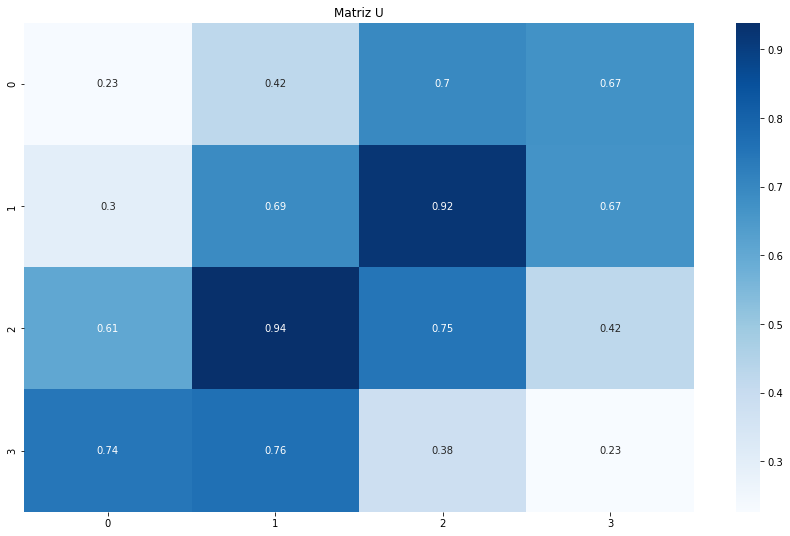

In [171]:
#CREAR LA MATRIZ U
uMatrix = kohonen.createUMatrix()
uMatrixDF = pd.DataFrame(uMatrix)
plt.figure(figsize = (15,9))
sns.heatmap(data=uMatrixDF,cmap=sns.color_palette("Blues", as_cmap=True     ),annot=True)
plt.title("Matriz U")

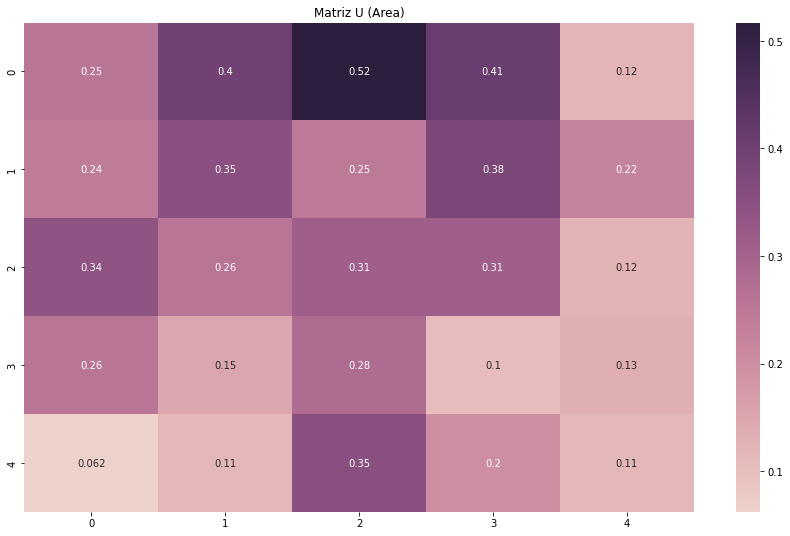

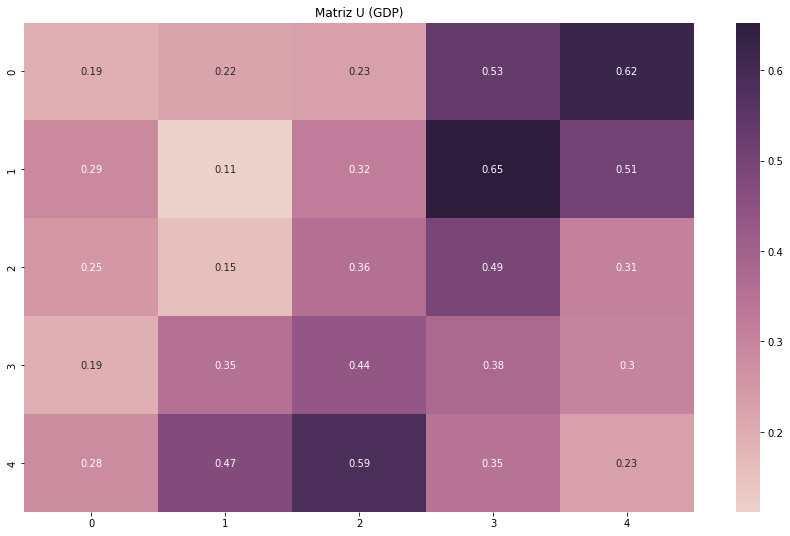

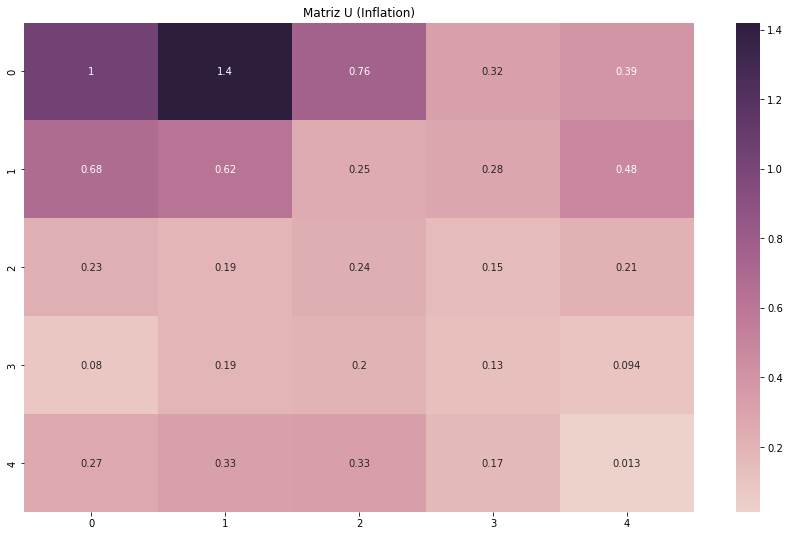

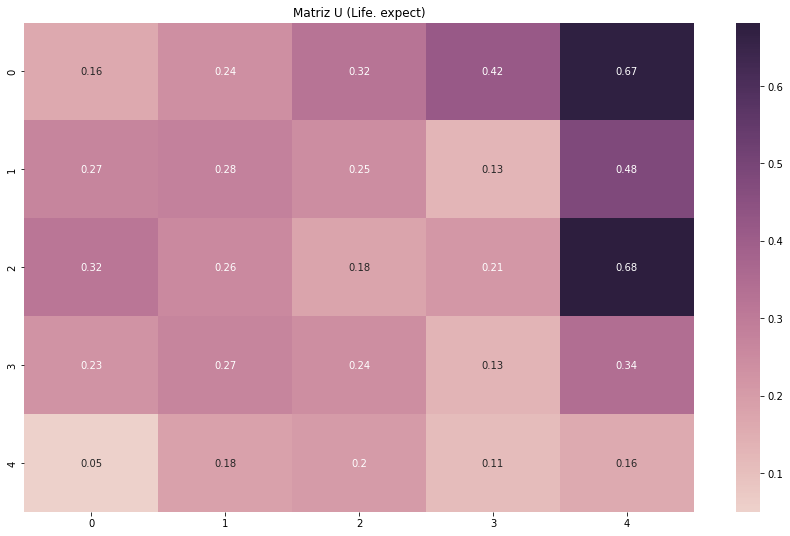

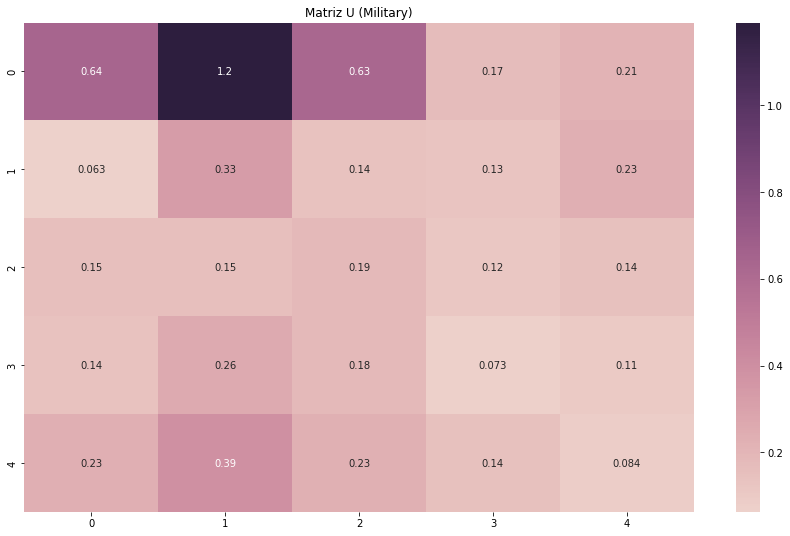

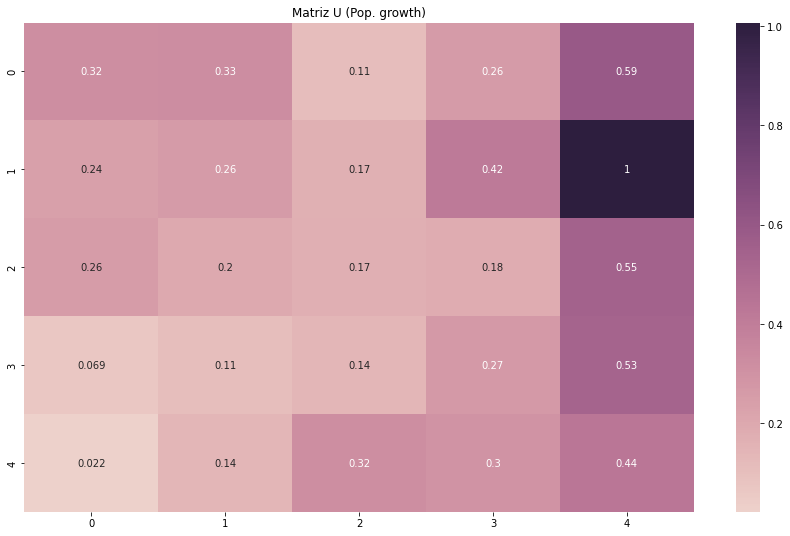

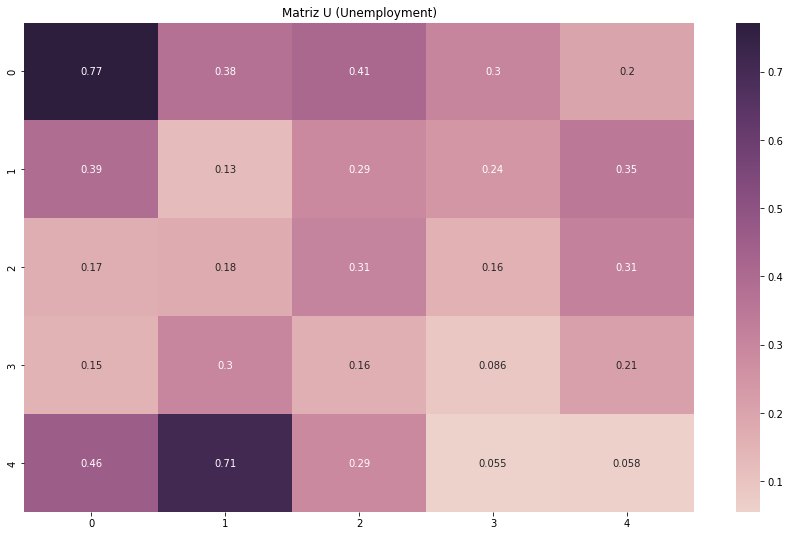

In [122]:
#CREAR MATRICES U POR CADA CARACTERISTICA
characteristics = ["Area","GDP","Inflation","Life. expect","Military","Pop. growth","Unemployment"]
for i in range(0,countriesCharacteristicsCount):
    #Creamos la matriz U de dicha caracteristica y la graficamos
    uMatrixCharacteristic = kohonen.createUMatrixPerCharacteristic(i)
    uMatrixCharacteristicDF = pd.DataFrame(uMatrixCharacteristic)
    plt.figure(figsize = (15,9))
    sns.heatmap(data=uMatrixCharacteristicDF,cmap=sns.cubehelix_palette(as_cmap=True),annot=True)
    plt.title("Matriz U ("+characteristics[i]+")")
    